## 1. 데이터 수집

In [5]:
import pandas as pd # pandas

train = pd.read_csv('C:/Users/user/Desktop/Python/train.csv') # train파일 불러오기
test = pd.read_csv('C:/Users/user/Desktop/Python/test.csv') # test파일 불러오기

# 판다스(Pandas)는 파이썬 데이터 처리를 위한 라이브러리이다. 파이썬을 이용한 데이터 분석과 같은 작업에서 필수 라이브러리로 알려져있다. 

## 2. 탐색적 자료 분석

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **데이터 딕셔너리**

- survived : 생존=1, 죽음=0
- pclass : 승객 등급(1등급=1, 2등급=2, 3등급=3)
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소(S=Southhampton, C=Cherbourg, Q=Queenstown)

NaN은 결측값을 의미한다.

In [7]:
test.head() # (행, 열) 갯수 반환

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape # (행, 열) 갯수 반환

(891, 12)

- train 데이터 셋에서 891개의 행과 12개의 열을 확인할 수 있다.

In [9]:
test.shape

(418, 11)

- test 데이터 셋에서 418개의 행과 11개의 열을 확인할 수 있다.
- test 데이터 셋에는 Survived 변수가 없다.
- 왜? train 데이터 셋에서 정보를 받아 머신러닝 모델을 만든 후 그것을 통해 test 데이터 셋에서 A라는 사람이 죽었는지 살았는지 확인하기 위해 Survived 변수가 없는 것은 당연함


In [10]:
train.info() # info(): 데이터의 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


나이와 Cabin에 대한 정보가 많이 유실되었다. 이런 부분은 그냥 머신러닝에 넣으면 문제가 생기기 때문에 feature engineering을 이용해 바꿔줘야 한다.
Feature Engineering이란 머신러닝 문제에 대해서 타겟에 대해서 최고로 잘 표현할 수 있게 가공되지 않은 데이터를 가공하는 것을 의미한다.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.isnull().sum() # 칼럼별 결측값의 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177개의 나이, 687개의 Cabin, 2개의 Embarked에 대한 정보가 존재하지 않는다.

In [13]:
test.isnull().sum() # 칼럼별 결측값의 개수

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

86개의 나이, 1개의 Fare, 327개의 Cabin에 대한 정보가 존재하지 않는다.

### **시각화를 위해 파이썬 라이브러리 가져오기**

In [464]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### **범주형 feature에 대한 막대 그래프**
- sex
- Pclass
- SibSp
- Parch
- Embarked
- Cabin

In [465]:
# 사용자 정의 함수 설정
## [feature].vaule_counts(): 해당 컬럼에 해당하는 값 개수 반환

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts() # 해당 컬럼에 해당하는 생존자 수
    dead = train[train['Survived'] == 0][feature].value_counts() # 해당 컴럼에 해당하는 사망자 수
    df = pd.DataFrame([survived, dead]) # 데이터프레임 생성
    df.index = ['Survived', 'Dead'] # 행 이름을 각각 'Survived', 'Dead'로 지정
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

In [16]:
## 예시
train[train['Survived'] == 1] # 생존자인 데이터만 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


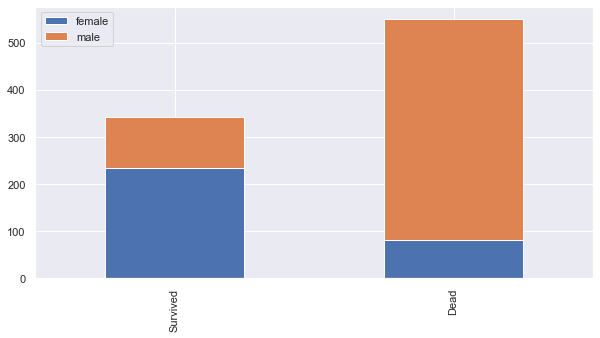

In [523]:
bar_chart('Sex')

생존자는 여성이, 사망자는 남성이 많음을 알 수 있다.

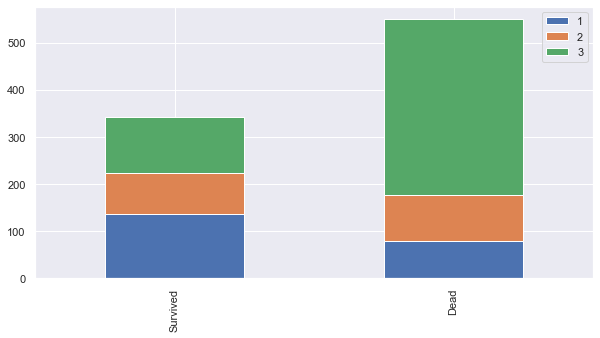

In [468]:
bar_chart('Pclass')

1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다는 것을 확인시켜 준다.
그리고 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높다는 것을 확인시켜 준다.

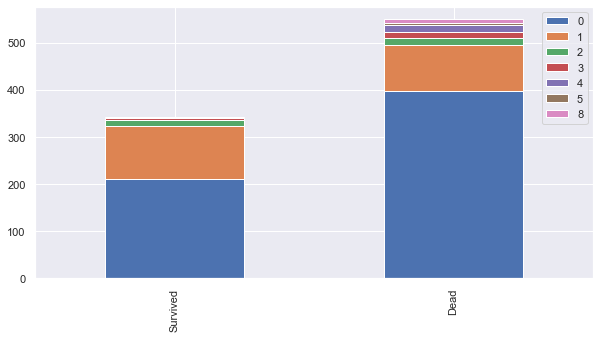

In [469]:
bar_chart('SibSp')

혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 확률이 높음을 알 수 있다.

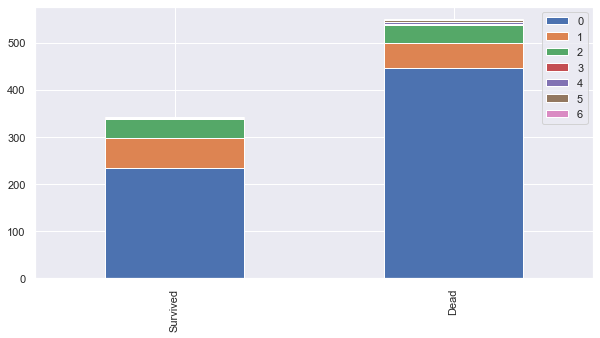

In [470]:
bar_chart('Parch')

부모나 자녀가 함께 탑승한 승객들이 생존할 가능성이 더 높다.

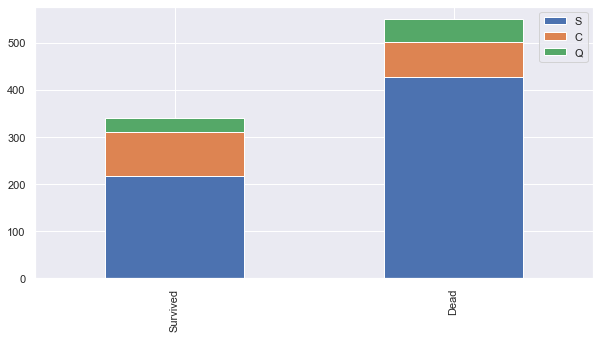

In [471]:
bar_chart('Embarked')

의미있는 정보를 얻을 수 없다.

여기 까지 우리는 탐색적 데이터 분석 과정에서 데이터 셋의 모양 확인, 타입을 확인하고 데이터의 Null값을 체크했다. 그리고 데이터 셋의 각 feature들이 생존(target)과 어떤 관계가 있는지 살펴보았다.
다음 과정은 feature engineering으로 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(feature)를 만들어내는 과정이다.

## 3. Feature engineering

feature는 바로 데이터의 칼럼을 말한다. 우리는 측량이 된 값들로 부터 정보를 얻으려고 한다.
그래서 feature들을 feature vector로 만들어야 한다.
row에 여러 개의 칼럼이 전부 다 숫자 즉, vector(숫자들의 배열)인 것을 feature vector라고 부른다.
기계입장에서는 텍스트를 이해하기 어려우므로 numerice(숫자)로 바꾸어야 한다.
또한 NaN을 알맞은 변수로 바꾸어야 한다.

In [526]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


먼저 볼 feature는 Name이다. 
이름에 따라 생사를 판단할 수 없지만 남자, 여자를 나타내는 데 Mr, Miss, Mrs 와 같은 중요한 정보들이 있다. 
Name에서 이름 항목을 삭제하여 Title이라는 새로운 칼럼에 넣는다.

### **3.1** Name

In [524]:
# str.extract(): 원하는 문자열 추출
# ' ([A-Za-z]+)\.' 뜻
## 1. 대문자 A-Z로 시작하고 두번째 문자부터는 (+가 붙었기 때문에 한 개 이상 = 여러 문자들이) 소문자이면서
## 2. 마지막 끝이 .(마침표)로 끝나는 것

train_test_data = [train, test] # train과 test 데이터 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [473]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Capt          1
Don           1
Countess      1
Ms            1
Sir           1
Mme           1
Name: Title, dtype: int64

In [474]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

각 호칭을 숫자에 매핑 시키자.
위에서 훈련 및 시험 데이터 세트를 결합했기 때문에 두 데이터 세트를 한번에 바꿔줄 수 있다.

### Title map

Mr: 0
Miss: 1
Mrs: 2
Others: 3

In [527]:
title_mapping ={"Mr": 0, "Miss": 1, "Mrs": 2,
                "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
                "Ms": 3, "Laby": 3, "Jonkheer": 3, "Sir": 3, "Don": 3, "Dona": 3, "Mme":3, "Capt": 3, "Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

# map: 여러 개의 데이터를 한번에 다른 형태로 변환
# 위 Title Dictionary에 맞게 숫자를 mapping 한다. 숫자로 바꾼 이유는 
# 대부분 머신러닝에서 알고리즘들은 텍스트를 읽지 못하기 때문이다.

In [528]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [529]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


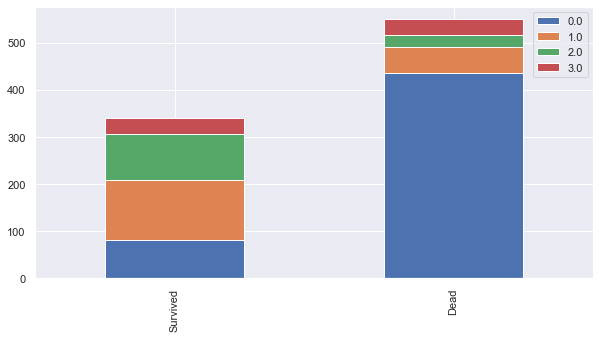

In [530]:
bar_chart('Title')

0번 Mr.(남성)은 상대적으로 많이 죽었음을 알 수 있다. 반면 1번과 2번 Miss와 Mrs.(여성)은 상대적으로 많이 생존했음을 알 수 있다.

데이터에서 Name에 대한 항목은 필요없으므로 train과 test dataset에서 삭제해주자.

In [532]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis = 1, inplace = True) # Name 컬럼 삭제
test.drop('Name', axis = 1, inplace = True) # Name 컬럼 삭제

# axis = 1: 컬럼을 뜻 함 / axis = 0(default): 행을 뜻 함
# inplace = True: 기존의 데이터를 이용한다.(Name이 삭제된 새로운 데이터가 생성되는 것이 아닌 기존의 데이터에서 Name을 삭제함)

In [533]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


### **4.3 Sex**

male: 0 / female:1

In [481]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
# 머신러닝은 텍스트를 읽지 못하기 때문에 숫자로 바꾼다.

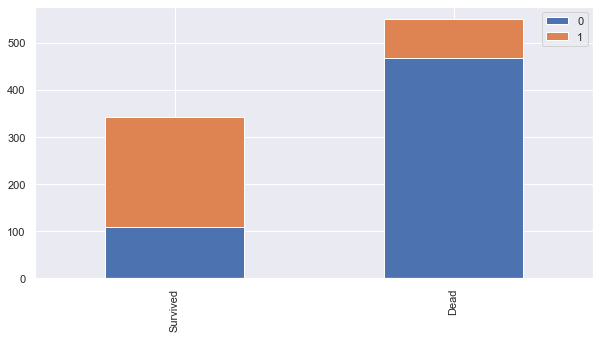

In [482]:
bar_chart('Sex')

In [483]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


In [484]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# NaN값을 채운다. Title을 바탕으로 0은 0(남자)나이의 평균, 1은 1(기혼여성)나이의 평균, 등등
# train/test의 Age 칼럼의 NaN값을 train의 Tilte로 group을 지어서 해당 그룹의 age 칼럼의 median값으로 대체한다.
# 0 = Mr, 1 = Mrs, 2 = Miss, 3 = Others
# fillna(): 결측값을 특정 값으로 채우기
# transform(): 

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)

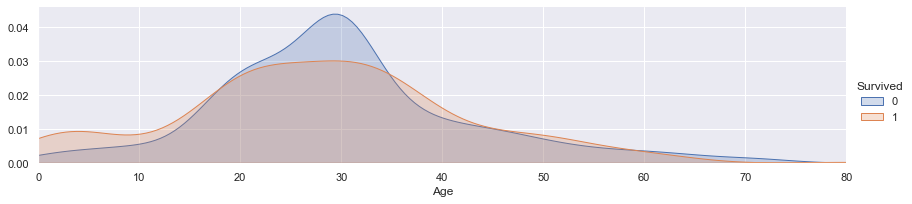

In [485]:
# hue로 지정된 칼럼의 종류별로 겹침
# 연령대별 생존자수, 사망자수 그래프 2개 겹침
# sns.kdeplot: 밀도플롯 그리기(히스토그램을 부드럽게 곡선화 시킨것)

facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4) 
facet.map(sns.kdeplot, 'Age', shade = True) # shade: 선 하단 음영 추가
facet.set(xlim = (0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례 추가

plt.show()

(0.0, 20.0)

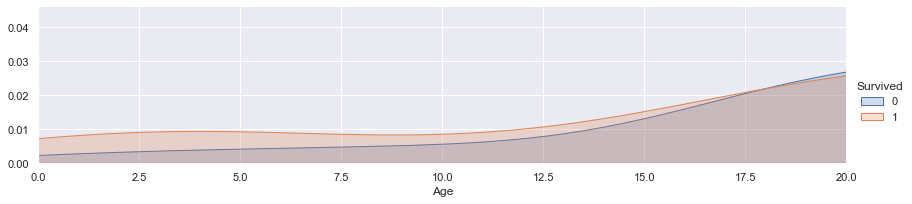

In [486]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) 
facet.map(sns.kdeplot, 'Age', shade = True) # shade: 선 하단 음영 추가
facet.set(xlim = (0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례 추가
plt.xlim(0, 20)

In [487]:
# loc[]: 데이터프레임 인덱싱

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4   


In [488]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2.0


<AxesSubplot:>

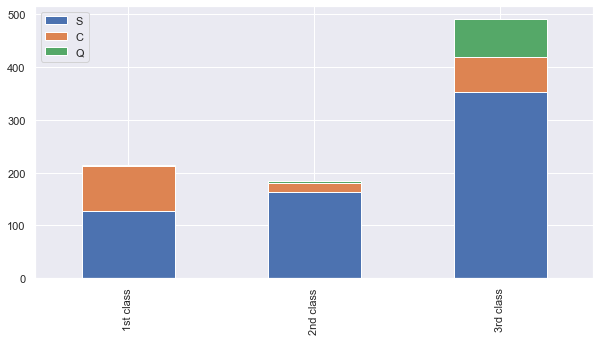

In [489]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3]) # 데이터프레임 생성
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# [feature].vaule_counts(): 해당 컬럼에 해당하는 값 개수 반환
# Q에서 탄 사람들에는 1등급이 거의 없다.
# Embarked 정보가 missing 이라면 S라고 해도 무방하다.

In [490]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# fillna(): 결측값을 특정 값으로 채우기

In [491]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [492]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    
# 머신러닝은 텍스트를 읽지 못하기 때문에 숫자로 바꾼다.

In [493]:
# Pclass는 Fare와 상관관계가 있다.
# 각 Pclass의 티켓 가격(Fare) 중앙값을 티켓 가격의 missing value에 넣는다.(위의 성별과 동일)
# 1등급의 중앙값을 1등급이면서 Fare가 missing인 곳에 넣는다.(2, 3등급도 마찬가지)

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

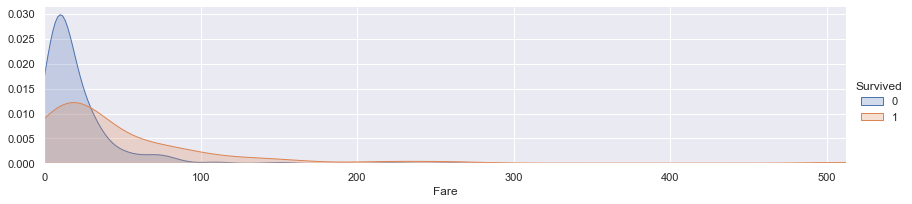

In [494]:
# hue로 지정된 칼럼의 종류별로 겹침
# Fare값에 따른 생존자수, 사망자수 그래프를 그린다.
# sns.kdeplot: 밀도플롯 그리기(히스토그램을 부드럽게 곡선화 시킨것)

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

# 싼 값의 티켓은 많은 사람들이 죽었음을 볼 수 있다.

In [495]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [496]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


In [497]:
# 4.7 Cabin
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
D              3
              ..
E40            1
C86            1
B82 B84        1
E17            1
B94            1
Name: Cabin, Length: 147, dtype: int64

In [498]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1] # 첫 번째 글자만 추출

<AxesSubplot:>

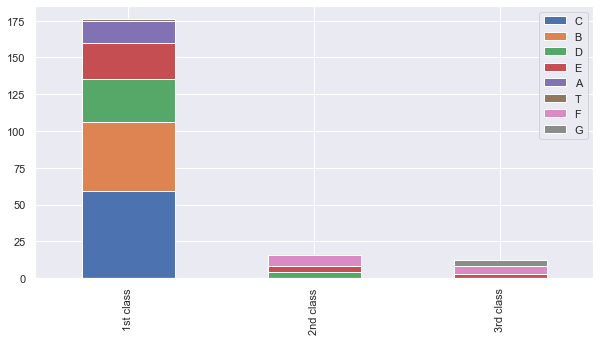

In [499]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts() # Pclass=1에 해당하는 Cabin값을 count
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# A,B,C,D,E가 1st Class에는 있지만 2nd Class와 3rd Calss에는 없다.

In [500]:
# 소수점을 이용하여 feature scaling 기법 적용
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [501]:
#Cabin(방 위치)는 Pclass와 상당한 관련이 있기에 각 Pclass별 중앙값을 Cabin의 missing값에 넣는다.
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [502]:
# 4.8 FamilySize(함께 동승한 부모와 아이들 수)
# 혼자 탔는지 함께 탔는지가 중요하므로 두 데이터를 합쳐 하나의 value로 만듦
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

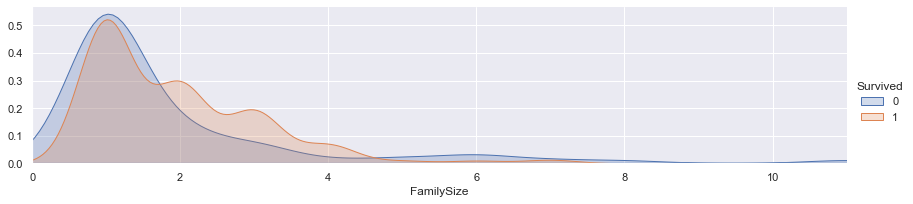

In [503]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

# 혼자 탔을 경우 많이 죽었음을 알 수 있다.

In [504]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [505]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [506]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

# axis = 1은 각 행의 모든 열에 대해서 동작한다.
# > drop: 각 행의 모든 열을 지운다.

In [508]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [509]:
train_data.head(10) # 숫자로만 구성되어있음 > 머신러닝 classifier를 통해 prediction 가능

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,3.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,0.0,2.0,1.8,1,2.0,0.4
